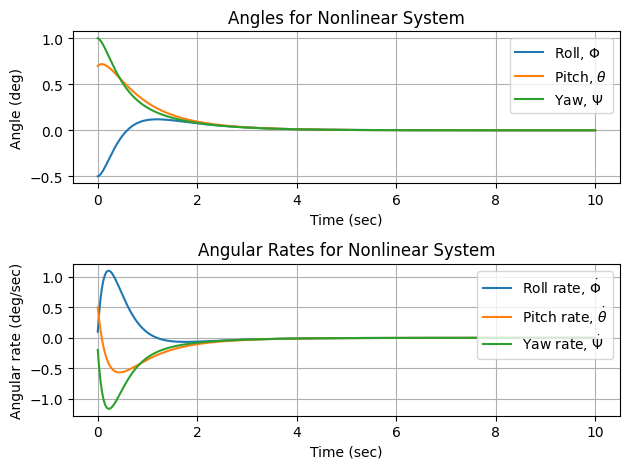

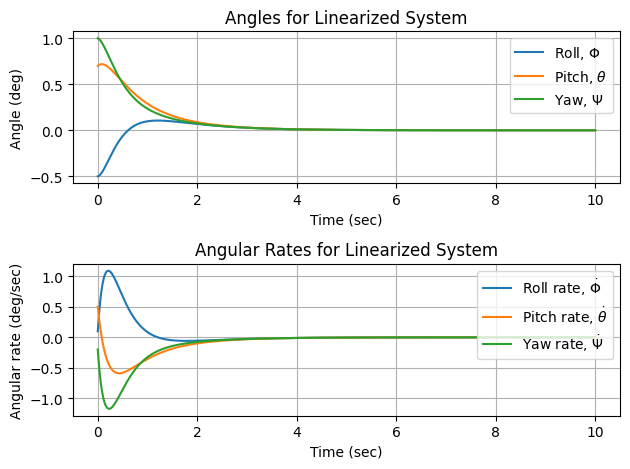

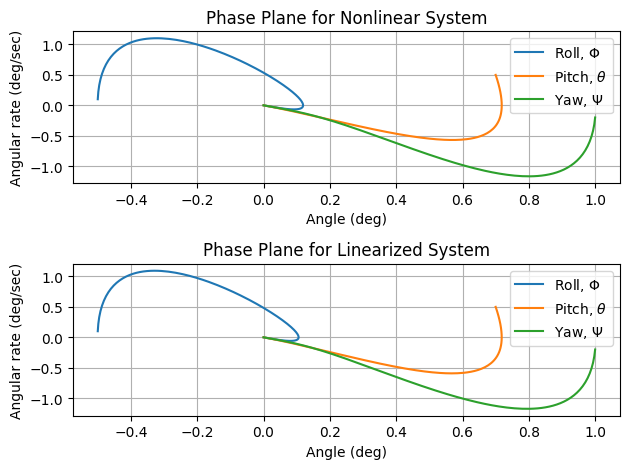

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import place_poles

def ControlDesign():
    mu = 398600.4418e9
    r = 6378.14e3 + 500e3
    w0 = np.sqrt(mu/r**3)
    J1 = 1700
    J2 = 2000
    J3 = 1400
    a1 = 1/J1*(3*w0**2*(J3-J2))
    a2 = 1/J1*(w0*(J2-J3))
    a3 = 1/J2*(2*w0**2*(J3-J1))
    a4 = 1/J3*(w0*(J1-J2))
    A = np.array([[0, 0, -w0, 1, 0, 0],
                  [0, 0, 0, 0, 1, 0],
                  [w0, 0, 0, 0, 0, 1],
                  [a1, 0, 0, 0, 0, a2],
                  [0, a3, 0, 0, 0, 0],
                  [0, 0, 0, a4, 0, 0]])
    B = np.block([[np.zeros((3, 3))],
                  [np.eye(3)/np.array([J1, J2, J3])]])
    poles = [-1, -2, -3, -4, -5, -6]
    K = place_poles(A, B, poles)
    return K.gain_matrix

def NonLinSC(x, t):
    J1 = 1700
    J2 = 2000
    J3 = 1400
    Omega = x[3:6]
    K = ControlDesign()
    u = -np.dot(K, x)
    phidot = Omega[0]
    thetadot = Omega[1]
    psidot = Omega[2]
    Omega1dot = 1/J1*((J2-J3)*Omega[1]*Omega[2] + u[0])
    Omega2dot = 1/J2*((J3-J1)*Omega[0]*Omega[2] + u[1])
    Omega3dot = 1/J3*((J1-J2)*Omega[1]*Omega[0] + u[2])
    deriv = np.array([phidot, thetadot, psidot, Omega1dot, Omega2dot, Omega3dot])
    return deriv

def LinSC(x, t):
    mu = 398600.4418e9
    r = 6378.14e3 + 500e3
    w0 = np.sqrt(mu/r**3)
    J1 = 1700
    J2 = 2000
    J3 = 1400
    Omega = x[3:6]
    K = ControlDesign()
    u = -np.dot(K, x)
    phidot = Omega[0] - w0*x[2]
    thetadot = Omega[1]
    psidot = Omega[2] + w0*x[0]
    Omega1dot = 1/J1*(w0*(J2-J3)*Omega[2]*3*w0**2*(J3-J2)*x[0] + u[0])
    Omega2dot = 1/J2*(3*w0**2*(J3-J1)*x[1] + u[1])
    Omega3dot = 1/J3*(w0*(J1-J2)*Omega[0] + u[2])
    deriv = np.array([phidot, thetadot, psidot, Omega1dot, Omega2dot, Omega3dot])
    return deriv

# Simulation time span
t_span = np.linspace(0, 10, 1000)

# Initial conditions
x0 = np.array([-0.5, 0.7, 1, 0.1, 0.5, -0.2])

# Solve the nonlinear system
sol_nonlin = odeint(NonLinSC, x0, t_span)

# Solve the linearized system
sol_lin = odeint(LinSC, x0, t_span)

# Extract the results
tn = t_span
xn = sol_nonlin[:, :3]
xl = sol_lin[:, :3]

# Plotting the results
plt.figure(1)

plt.subplot(2, 1, 1)
plt.plot(tn, xn)
plt.title('Angles for Nonlinear System')
plt.xlabel('Time (sec)')
plt.ylabel('Angle (deg)')
plt.legend(['Roll, $\Phi$', 'Pitch, $\\theta$', 'Yaw, $\\Psi$'])
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(tn, sol_nonlin[:, 3:])
plt.title('Angular Rates for Nonlinear System')
plt.xlabel('Time (sec)')
plt.ylabel('Angular rate (deg/sec)')
plt.legend(['Roll rate, $\\dot{\\Phi}$', 'Pitch rate, $\\dot{\\theta}$', 'Yaw rate, $\\dot{\\Psi}$'],loc='upper right')
plt.grid(True)

plt.tight_layout()

plt.figure(2)

plt.subplot(2, 1, 1)
plt.plot(tn, xl)
plt.title('Angles for Linearized System')
plt.xlabel('Time (sec)')
plt.ylabel('Angle (deg)')
plt.legend(['Roll, $\Phi$', 'Pitch, $\\theta$', 'Yaw, $\\Psi$'])
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(tn, sol_lin[:, 3:])
plt.title('Angular Rates for Linearized System')
plt.xlabel('Time (sec)')
plt.ylabel('Angular rate (deg/sec)')
plt.legend(['Roll rate, $\\dot{\\Phi}$', 'Pitch rate, $\\dot{\\theta}$', 'Yaw rate, $\\dot{\\Psi}$'],loc='upper right')
plt.grid(True)

plt.tight_layout()

plt.figure(3)

plt.subplot(2, 1, 1)
plt.plot(sol_nonlin[:, 0], sol_nonlin[:, 3])
plt.plot(sol_nonlin[:, 1], sol_nonlin[:, 4])
plt.plot(sol_nonlin[:, 2], sol_nonlin[:, 5])
plt.title('Phase Plane for Nonlinear System')
plt.xlabel('Angle (deg)')
plt.ylabel('Angular rate (deg/sec)')
plt.legend(['Roll, $\Phi$', 'Pitch, $\\theta$', 'Yaw, $\\Psi$'])
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(sol_lin[:, 0], sol_lin[:, 3])
plt.plot(sol_lin[:, 1], sol_lin[:, 4])
plt.plot(sol_lin[:, 2], sol_lin[:, 5])
plt.title('Phase Plane for Linearized System')
plt.xlabel('Angle (deg)')
plt.ylabel('Angular rate (deg/sec)')
plt.legend(['Roll, $\Phi$', 'Pitch, $\\theta$', 'Yaw, $\\Psi$'])
plt.grid(True)

plt.tight_layout()
plt.show()
